In [1]:
import os
import pandas as pd
import numpy as np
from json import load
import matplotlib.pyplot as plt
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=2)

,command,mean,stddev,median,user,system,min,max,times,p_ex,p_file,p_path
8,cat dlx2_cluster2.txt | timeout -s INT 10m ../...,0.014254,0.001294,0.014071,0.009704,0.004025,0.012111,0.018136,"[0.013344395900000002, 0.016422206900000007, 0...",dlx2,cluster2.txt,./samples/cluster2.txt
11,cat cluster2.txt | timeout -s INT 10m ../bin/dlx2,0.012648,0.000768,0.012355,0.009062,0.003093,0.011912,0.017855,"[0.013911043805000002, 0.013315367805000002, 0...",dlx2,cluster2.txt,./samples/cluster2.txt
13,cat dlx2_amenage5.txt | timeout -s INT 10m ../...,0.006480,0.001142,0.006271,0.002617,0.003576,0.004949,0.011244,"[0.00524377985, 0.00678831285, 0.00864572185, ...",dlx2,amenage5.txt,./samples/amenage5.txt
20,cat amenage5.txt | timeout -s INT 10m ../bin/dlx2,0.005779,0.000515,0.005669,0.002450,0.002962,0.005057,0.008254,"[0.008100580195, 0.0057159651950000005, 0.0057...",dlx2,amenage5.txt,./samples/amenage5.txt


,command,mean,stddev,median,user,system,min,max,times,p_ex,p_file,p_path
0,cat ../instances/graceful9.txt | timeout -s IN...,0.084859,0.002259,0.084569,0.080534,0.003735,0.081386,0.093324,"[0.086298558105, 0.081386143105, 0.08275592510...",xcc-with-sparse-sets,graceful9.txt,../instances/graceful9.txt
1,cat ../instances/ex94.txt | timeout -s INT 10m...,0.007930,0.001552,0.007074,0.004090,0.003504,0.006732,0.013077,"[0.012465738420000004, 0.010264461420000003, 0...",xcc-with-sparse-sets,ex94.txt,../instances/ex94.txt
2,cat ../instances/menage5.txt | timeout -s INT ...,0.005798,0.000673,0.005558,0.002530,0.002971,0.005100,0.012424,"[0.006237780449999999, 0.0060343214499999995, ...",xcc-with-sparse-sets,menage5.txt,../instances/menage5.txt
3,cat ../instances/cluster2.txt | timeout -s INT...,0.012005,0.000921,0.011895,0.008387,0.003161,0.010848,0.014778,"[0.012363435390000002, 0.013189589390000003, 0...",xcc-with-sparse-sets,cluster2.txt,../instances/cluster2.txt
4,cat ../instances/graceful5.txt | timeout -s IN...,0.005737,0.000436,0.005568,0.002714,0.002802,0.005208,0.008012,"[0.007248211655000002, 0.006296888655000002, 0...",xcc-with-sparse-sets,graceful5.txt,../instances/graceful5.txt
5,cat ../instances/langford11.txt | timeout -s I...,0.078595,0.002048,0.078443,0.074223,0.003957,0.074781,0.084680,"[0.080323942965, 0.07809862496500002, 0.078834...",xcc-with-sparse-sets,langford11.txt,../instances/langford11.txt
6,cat ../instances/cluster3.txt | timeout -s INT...,0.060498,0.002590,0.059932,0.055998,0.003819,0.055752,0.072278,"[0.058960229575, 0.060461757575, 0.06118901157...",xcc-with-sparse-sets,cluster3.txt,../instances/cluster3.txt
7,cat ../instances/menage12.txt | timeout -s INT...,9.293261,0.060712,9.300192,9.214507,0.025171,9.201526,9.365239,"[9.365238827779999, 9.20152580378, 9.322230402...",xcc-with-sparse-sets,menage12.txt,../instances/menage12.txt
9,cat xcc-with-sparse-sets_cluster2.txt | timeou...,0.013224,0.001788,0.012850,0.008895,0.003789,0.011203,0.027377,"[0.012734049900000004, 0.016496067900000005, 0...",xcc-with-sparse-sets,cluster2.txt,./samples/cluster2.txt
10,cat ../instances/cluster4.txt | timeout -s INT...,1.520678,0.017002,1.524257,1.510939,0.006602,1.498561,1.536637,"[1.52425735949, 1.49856113149, 1.5360442224900...",xcc-with-sparse-sets,cluster4.txt,../instances/cluster4.txt


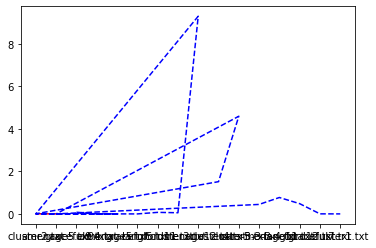

In [2]:
results_dir = 'results'
names = os.listdir(results_dir)
results = []
for name in names:
    filename = results_dir + '/' + name
    with open(filename) as f:
        entries = load(f)['results']
        for e in entries:
            for p in e['parameters']:
                e['p_'+p] = e['parameters'][p]
            del e['parameters']
        results.extend(entries)

df = pd.DataFrame(results)
knuth = df[df.p_ex=='dlx2']
solnon = df[df.p_ex=='xcc-with-sparse-sets']
display(knuth)
display(solnon)
plt.plot(knuth['p_file'],knuth['mean'],'r--',solnon['p_file'],solnon['mean'],'b--')